<a href="https://colab.research.google.com/github/eunsol123/BoardMVC_JSP/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_with_%ED%8C%8C%EC%9D%B4%EC%8D%AC_UNIT15_~_UNIT16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기본 설정

In [2]:
%tensorflow_version # 텐서플로 라이브러리의 버전을 확인

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
import keras # 케라스 라이브러리를 불러오는 코드

mnist_deeplearning (숫자를 구분하는 인공지능을 만들기)

In [4]:
from tensorflow.keras.models import Sequential # 시퀀셜(순차적인 신경망을 구성할 때 사용할 수 있는 함수) 모델을 불러오는 명령어

from tensorflow.keras.layers import Dense, Activation # 레이어 도구(layers) 중 Dense와 Activation 도구를 불러오는 명령어

from tensorflow.keras.utils import to_categorical # 유틸 도구(utils) 중 to_categorical 함수를 불러오는 명령어

from tensorflow.keras.datasets import mnist # mnist 데이터셋(케리스를 사용하여 딥러닝 모델 개발을 연습할 수 있는 데이터)을 불러오는 명령어

import numpy as np # 넘파이라는 수학 계산 라이브러리를 사용한다 이때 as 명령어로 함수 이름을 바꿀 수 있다. 이제 우리는 numpy를 np로 줄여서 사용

import matplotlib.pyplot as plt #맷플로립(matplotlib)이라는 그래프 라이브러리를 사용

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist 데이터셋에는 load_data()라는 함수가 포함되어 있는데 mnist 데이터셋에서 데이터를 불러오라는 명령어

print("x_train shape", x_train.shape) # print문을 사용하여 x_train 데이터의 형태를 출력하는 명령어

print("y_train shape", y_train.shape) # print문을 사용하여 y_train 데이터의 형태를 출력하는 명령어

print("x_test shape", x_test.shape) # print문을 사용하여 x_test 데이터의 형태를 출력하는 명령어 (x_train 데이터와 다른 점은 데이터의 총 개수)

print("y_test shape", y_test.shape) # print문을 사용하여 y_test 데이터의 형태를 출력하는 명령어 (y_train 데이터와 다른 점은 데이터의 총 개수)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
X_train = x_train.reshape(60000, 784) # 28×28 형태인 x_train 데이터를 1×784로 바꾸는 명령어

X_test = x_test.reshape(10000, 784) # 28×28 형태인 x_test 데이터를 1×784로 바꾸는 명령어

X_train = X_train.astype('float32') # 정수 형태인 X_train 데이터의 형태를 실수 형태로 바꾸고 그 데이터를 다시 X_train 변수에 넣는다 (데이터가 정규화하기 때문에 자료형을 실수 형태로 바꿔 준다)

X_test = X_test.astype('float32') # 정수 형태인 X_test 데이터의 형태를 실수 형태로 바꾸고 그 데이터를 다시 X_test 변수에 넣는다 (데이터가 정규화하기 때문에 자료형을 실수 형태로 바꿔 준다)

X_train /= 255 # X_train의 각 데이터를 255로 나눈 값을 다시 X_train에 저장하는 코드

X_test /= 255 # X_test의 각 데이터를 255로 나눈 값을 다시 X_test에 저장하는 코드

print("X Training matrix shape", X_train.shape) # X_train 데이터의 바뀐 형태를 출력

print("X Testing matrix shape", X_test.shape) # X_test 데이터의 바뀐 형태를 출력

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [7]:
Y_train = to_categorical(y_train, 10) # Y_train 데이터를 원-핫 인코딩하여 Y_train에 넣는다

Y_test = to_categorical(y_test, 10) # y_test 데이터를 원-핫 인코딩하여 Y_test에 넣는다

print("Y Training matrix shape", Y_train.shape) # Y_train 데이터의 바뀐 형태를 출력한다

print("Y Testing matrix shape", Y_test.shape) # Y_test 데이터의 바뀐 형태를 출력한다

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [8]:
model = Sequential() # 딥러닝에 사용할 모델(model)을 시퀀셜 모델(Sequential)로 정의한다

model.add(Dense(512, input_shape=(784,))) # 모델에 층을 추가(추가하는 명령어는 add)

model.add(Activation('relu')) # 다음 층으로 값을 전달할 때 어떤 활성화 함수를 사용하여 전달할지를 결정

model.add(Dense(256)) # 다음 층을 추가 두 번째 은닉층은 256개의 노드로 구성되어 있다

model.add(Activation('relu')) # relu 방식으로 값을 전달

model.add(Dense(10)) # 마지막 층을 추가 마지막 층은 10개의 노드로 구성되어 있다

model.add(Activation('softmax')) # 각 노드에서 전달되는 값의 총 합이 1이 되도록 소프트맥스 함수를 사용한다

model.summary() # summary 함수는 모델이 어떻게 구성되었는지 살펴보는 함수

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
# 케라스는 심층 신경망의 학습하는 방법을 정하는 명령어를 제공한다
# 이 함수를 사용하기 위한 규칙(오차값을 계산하는 방법을 알려줘야함, 오차를 줄이는 방법을 알려줘야함, 학습 결과를 어떻게 확인할지 알려줘야함) 
# 정확도(accuracy)는 실제 60,000개 데이터의 예측 결과와 실제 값을 비교해 본 후 정답 비율을 알려준다

model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)
# 라스는 학습시키기 위해 ‘맞춘다’는 의미를 가진 fit 함수를 제공한다
# 입력할 데이터를 정한다 ( X_train, Y_train 데이터를 사용하여 인공지능 모델을 학습하기 때문에 이 두 가지를 넣었음)
# 배치 사이즈(batch_size)를 정한다 (배치 사이즈는 128)
# 에포크(epochs)를 정한다 (모든 데이터를 10번 반복해서 학습시키겠다)
# verbose 값은 0, 1, 2 중 하나로 결정할 수 있다 (0:아무런 표시를 하지 않음, 1:에포크별 진행 사항을 알려줌, 2:에포크별 학습 결과를 알려줌)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0078 - accuracy: 0.9977
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0072 - accuracy: 0.9979
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9992
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9976
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9973

In [15]:
score = model.evaluate(X_test, Y_test) 
# 케라스의 evaluate 함수는 모델의 정확도를 평가할 수 있는 기능을 제공
# 첫 번째 데이터는 테스트할 데이터로, 여기에서는 X_test를 입력한다 
# 두 번째 데이터는 테스트할 데이터의 정답으로, 여기에서는 Y_test를 입력한다

print('Test score:', score[0]) # 오차값을 출력하기 위해 score 변수의 첫 번째 항목인 점수를 출력

print('Test accuracy:', score[1]) # score 변수의 두 번째 항목인 정확도를 출력

313/313 [==============================] - 1s 2ms/step - loss: 0.1031 - accuracy: 0.9829
Test score: 0.10314394533634186
Test accuracy: 0.9829000234603882


In [17]:
predicted_classes = np.argmax(model.predict(X_test), axis=1) #  model에서 결과를 예측하는 함수인 predict 함수에 X_test 데이터를 입력

correct_indices = np.nonzero(predicted_classes == y_test)[0] # 실제 값과 예측 값이 일치하는 값을 찾아내어 correct_indices 변수에 저장하는 과정 (어떤 그림을 정확하게 예측하였는지 살펴보는 과정)

incorrect_indices = np.nonzero(predicted_classes != y_test)[0] # 인공지능이 예측하지 못한 값은 무엇이며, 그 숫자는 어떤 모양인지를 찾아본다

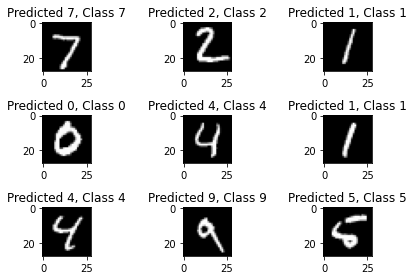

In [19]:
plt.figure() # matplotlib을 사용하여 그래프를 그리려면, 그래프를 그리겠다는 명령을 먼저 수행해야한다 그 명령어가 바로 figure 함수이며, 이를 사용하여 그림을 그릴 준비를한다

for i in range(9):# 파이썬의 for 반복문으로 지금부터 그림 9개를 그린다

    plt.subplot(3,3,i+1) 
    # subplot 함수는 그림의 위치를 정해주는 함수
    # 가로 3개, 세로 3개의 그림을 그릴 것이고, 지금 그림은 i+1번째에 넣게 된다
    # 첫 번째 반복에서는 i의 값이 0이고 i+1의 값이 1이기 때문에 첫 번째에 넣는다는 의미가 된다 반복되어 가며 9번째 그림까지 순서가 맞아집니다.

    correct = correct_indices[i] # correct_indices 배열에서 첫 번째부터 아홉 번째까지의 값을 반복할 때마다 correct 변수에 넣는다

    plt.imshow(X_test[correct].reshape(28,28), cmap='gray') 
    # imshow 함수는 어떤 이미지를 보여줄지에 대한 내용을 담고 있다
    # 형태를 다시 28×28의 형태로 바꿔 주고, 그림을 회색조로 나타내기 위해 cmap='gray'를 입력한다

    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    # 그림 설명을 넣는 코드
    # 예측한 값을 나타내기 위해 Predicted {(값이 들어가는 공간)}에 예측한 결괏값(predicted_classes[correct])을 넣는다. 
    # 그리고 실제 값을 나타내고자 Class {(값이 들어가는 공간)}에 실제 값(y_test[correct])을 넣는다

plt.tight_layout()
# 화면에 그림을 보여주기 위해 tight_layout 함수를 사용

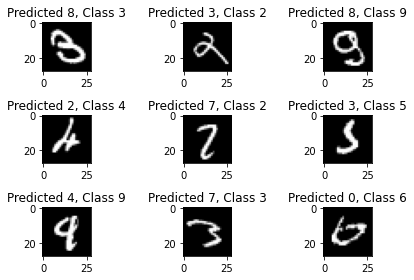

In [21]:
plt.figure() # 그림을 그릴 준비를 한다

for i in range(9): # 파이썬의 for 반복문을 사용하여 그림 9개를 그린다

    plt.subplot(3,3,i+1) # 그림의 순서를 정해준다

    incorrect = incorrect_indices[i] # incorrect_indices 배열에서 첫 번째부터 아홉 번째까지의 값을 반복할 때마다 incorrect 변수에 넣는다

    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray') 
    # imshow 함수는 어떤 이미지를 보여줄지에 대한 내용을 담고 있다
    # 형태를 다시 28×28의 형태로 바꿔 주고, 그림을 회색조로 나타내기 위해 cmap='gray'를 입력한다

    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    # 그림 설명을 넣는 코드
    # 예측한 값을 나타내기 위해 Predicted {(값이 들어가는 공간)}에 예측한 결괏값(predicted_classes[correct])을 넣는다. 
    # 그리고 실제 값을 나타내고자 Class {(값이 들어가는 공간)}에 실제 값(y_test[correct])을 넣는다

plt.tight_layout()
# 화면에 그림을 보여주기 위해 tight_layout 함수를 사용